# Week 5: Neural Networks Fundamentals
## COMP 9130 - Applied Artificial Intelligence
## Student Starter Template

---

**Student Names:** Binger Yu & Vibhor Malik

**Date:** February 5, 2026

---

### ⏰ Today's Schedule

| Time | Activity | Points |
|------|----------|--------|
| 0:00-0:10 | Quiz 4: Neural Network Fundamentals | 5 pts |
| 0:10-0:15 | Setup & Introduction | - |
| 0:15-1:05 | **Task 1:** Neural Network from Scratch | 5 pts |
| 1:05-1:15 | Break | - |
| 1:15-2:05 | **Task 2:** MLP with Keras on MNIST | 5 pts |
| 2:05-2:55 | **Task 3:** Architecture Experiments | 5 pts |
| 2:55-3:00 | Wrap-up & Mini Project 4 Introduction | - |

**Total Participation Points: 20**

---

### 🤖 AI Assistance Policy

**✅ ALLOWED:**
- Syntax help and debugging
- Explaining concepts or error messages
- "How do I..." questions about specific functions

**❌ NOT ALLOWED:**
- "Complete this task for me"
- Copying entire solutions
- Having AI answer analysis questions for you

**📝 RULE:** If you can't explain the code to your partner, you haven't learned it!

---

### 🎯 Learning Objectives

By the end of this session, you will be able to:
1. Implement a forward pass through a neural network using NumPy
2. Build and train a multi-layer perceptron (MLP) using Keras
3. Apply different activation functions and understand their effects
4. Use regularization techniques to improve training
5. Interpret training curves and diagnose overfitting/underfitting

---

## Setup & Imports

Run this cell first to import all required libraries.

In [9]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Verify versions
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"\nGPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

NumPy version: 1.26.4
TensorFlow version: 2.16.2
Keras version: 3.13.2

GPU Available: True


---

## 📊 Data Loading & Exploration

Let's load the MNIST dataset and explore its structure.

In [10]:
# Load MNIST dataset
(X_train_raw, y_train), (X_test_raw, y_test) = mnist.load_data()

print("=== MNIST Dataset ===")
print(f"Training images shape: {X_train_raw.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {X_test_raw.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"\nPixel value range: [{X_train_raw.min()}, {X_train_raw.max()}]")
print(f"Unique labels: {np.unique(y_train)}")

=== MNIST Dataset ===
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: [0, 255]
Unique labels: [0 1 2 3 4 5 6 7 8 9]


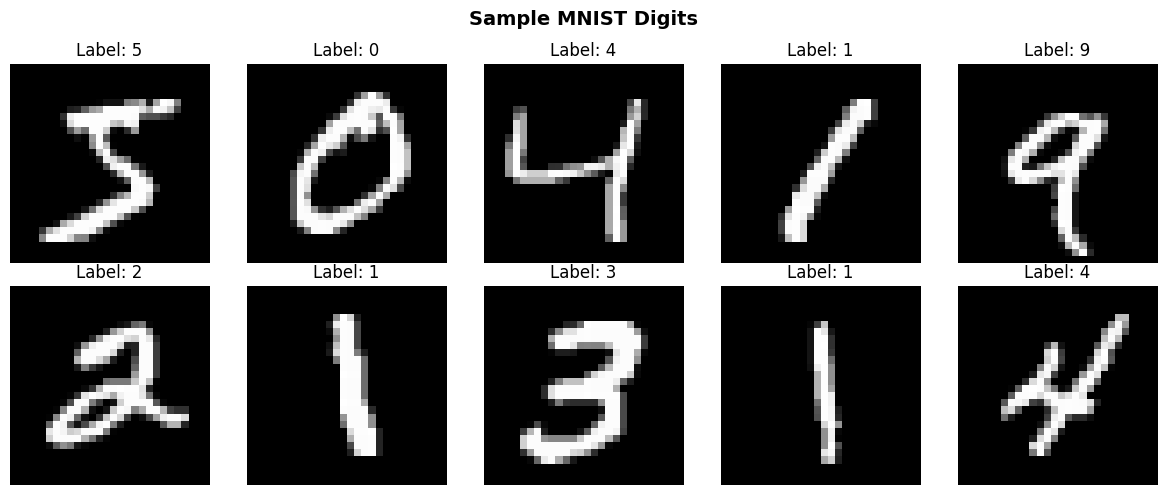

In [11]:
# Visualize some sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_raw[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}", fontsize=12)
    ax.axis('off')
plt.suptitle("Sample MNIST Digits", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 💬 Discussion: Data Understanding

Before we begin, make sure you understand:
- Each image is 28×28 pixels = 784 total pixels
- Pixel values range from 0 (black) to 255 (white)
- There are 10 classes (digits 0-9)
- We have 60,000 training images and 10,000 test images

---

---

# 🎯 Task 1: Neural Network from Scratch (50 minutes)

**5 points | Work in pairs**

## Goal
Understand what happens inside a neural network by implementing forward propagation manually using only NumPy. No Keras allowed in this task!

## Architecture
We will build a 2-layer neural network:
```
Input (784) → Hidden (128 neurons, ReLU) → Output (10 neurons, Softmax)
```

---

## Part 1A: Prepare Data

We'll use a subset of 1000 images to keep things fast.

In [13]:
# Take a small subset for our from-scratch implementation
n_samples = 1000

# TODO: Flatten the images from (N, 28, 28) to (N, 784)
# Hint: Use reshape with -1 to automatically calculate one dimension
X_scratch = X_train_raw[:n_samples].reshape(n_samples, -1)

y_scratch = y_train[:n_samples]

# TODO: Normalize pixel values to the range [0, 1]
# Hint: What is the maximum pixel value?
X_scratch = X_scratch.astype("float32") / 255.0

print(f"X_scratch shape: {X_scratch.shape}")
print(f"y_scratch shape: {y_scratch.shape}")
print(f"Pixel value range: [{X_scratch.min():.2f}, {X_scratch.max():.2f}]")

X_scratch shape: (1000, 784)
y_scratch shape: (1000,)
Pixel value range: [0.00, 1.00]


**Expected output:**
```
X_scratch shape: (1000, 784)
y_scratch shape: (1000,)
Pixel value range: [0.00, 1.00]
```

## Part 1B: Initialize Network Parameters

Create weight matrices and bias vectors for our 2-layer network.

In [14]:
# Network architecture
input_size = 784    # 28 x 28 pixels
hidden_size = 128   # Hidden layer neurons
output_size = 10    # 10 digit classes

# TODO: Initialize W1 - weights connecting input to hidden layer
# Shape should be (input_size, hidden_size)
# Use small random values: np.random.randn(...) * 0.01
W1 = np.random.randn(input_size, hidden_size) * 0.01

# TODO: Initialize b1 - bias for hidden layer
# Shape should be (1, hidden_size)
# Initialize to zeros
b1 = np.zeros((1, hidden_size))

# TODO: Initialize W2 - weights connecting hidden to output layer
# Shape should be (hidden_size, output_size)
W2 = np.random.randn(hidden_size, output_size) * 0.01

# TODO: Initialize b2 - bias for output layer
# Shape should be (1, output_size)
b2 = np.zeros((1, output_size))

print("=== Network Parameters ===")
print(f"W1 shape: {W1.shape}  (input → hidden)")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}  (hidden → output)")
print(f"b2 shape: {b2.shape}")
print(f"\nTotal parameters: {W1.size + b1.size + W2.size + b2.size:,}")

=== Network Parameters ===
W1 shape: (784, 128)  (input → hidden)
b1 shape: (1, 128)
W2 shape: (128, 10)  (hidden → output)
b2 shape: (1, 10)

Total parameters: 101,770


**Expected output:**
```
=== Network Parameters ===
W1 shape: (784, 128)  (input → hidden)
b1 shape: (1, 128)
W2 shape: (128, 10)  (hidden → output)
b2 shape: (1, 10)

Total parameters: 101,770
```

💬 **Discussion:** Why do we use small random values instead of zeros?

## Part 1C: Implement Activation Functions

Implement ReLU (for hidden layer) and Softmax (for output layer).

In [16]:
def relu(z):
    """
    ReLU activation function.
    Returns the element-wise maximum of 0 and the input.

    Args:
        z: Input array of any shape

    Returns:
        Array of same shape with ReLU applied
    """
    # TODO: Implement ReLU
    # Hint: Use np.maximum to compare each element with 0
    return np.maximum(0, z)


def softmax(z):
    """
    Softmax activation function with numerical stability.
    Converts logits to probabilities that sum to 1.

    Args:
        z: Input array of shape (N, num_classes)

    Returns:
        Array of same shape with probabilities
    """
    # TODO: Implement softmax with numerical stability
    # Step 1: Subtract the maximum value in each row to prevent overflow
    z_stable = z - np.max(z, axis=1, keepdims=True)
    
    # Step 2: Apply exp() to the stabilized values
    exp_z = np.exp(z_stable)
    
    # Step 3: Divide each row by its sum to get probabilities
    # Hint: Use keepdims=True when computing max and sum along axis=1
    # YOUR CODE HERE
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [17]:
# Test your activation functions
print("=== Testing Activation Functions ===")

# Test ReLU
test_input = np.array([[-2, -1, 0, 1, 2]])
print(f"ReLU input:  {test_input}")
print(f"ReLU output: {relu(test_input)}")

# Test Softmax
test_logits = np.array([[2.0, 1.0, 0.1]])
softmax_output = softmax(test_logits)
print(f"\nSoftmax input:  {test_logits}")
print(f"Softmax output: {softmax_output}")
print(f"Sum of softmax: {softmax_output.sum():.4f} (should be 1.0)")

# Test numerical stability with large values
large_logits = np.array([[1000, 1001, 1002]])
print(f"\nLarge logits softmax: {softmax(large_logits)} (should NOT be nan)")

=== Testing Activation Functions ===
ReLU input:  [[-2 -1  0  1  2]]
ReLU output: [[0 0 0 1 2]]

Softmax input:  [[2.  1.  0.1]]
Softmax output: [[0.65900114 0.24243297 0.09856589]]
Sum of softmax: 1.0000 (should be 1.0)

Large logits softmax: [[0.09003057 0.24472847 0.66524096]] (should NOT be nan)


**Expected output:**
```
=== Testing Activation Functions ===
ReLU input:  [[-2 -1  0  1  2]]
ReLU output: [[0 0 0 1 2]]

Softmax input:  [[2.  1.  0.1]]
Softmax output: [[0.659... 0.242... 0.098...]]
Sum of softmax: 1.0000 (should be 1.0)

Large logits softmax: [[0.09... 0.24... 0.66...]] (should NOT be nan)
```

## Part 1D: Implement Forward Pass

Implement the complete forward pass through the network.

In [18]:
def forward_pass(X, W1, b1, W2, b2):
    """
    Complete forward pass through 2-layer neural network.

    Architecture: Input → Hidden (ReLU) → Output (Softmax)

    Args:
        X: Input data of shape (N, 784)
        W1, b1: Weights and bias for layer 1
        W2, b2: Weights and bias for layer 2

    Returns:
        a2: Output probabilities of shape (N, 10)
        cache: Dictionary with intermediate values
    """
    # TODO: Layer 1 - Input to Hidden
    # Step 1: Compute z1 = X @ W1 + b1 (linear transformation)
    # Step 2: Compute a1 = relu(z1) (activation)
    z1 = X @ W1 + b1
    a1 = relu(z1)

    # TODO: Layer 2 - Hidden to Output
    # Step 1: Compute z2 = a1 @ W2 + b2 (linear transformation)
    # Step 2: Compute a2 = softmax(z2) (activation)
    z2 = a1 @ W2 + b2
    a2 = softmax(z2)

    # Cache intermediate values
    cache = {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}

    return a2, cache

In [19]:
# Run forward pass on our data
predictions, cache = forward_pass(X_scratch, W1, b1, W2, b2)

print("=== Forward Pass Results ===")
print(f"Input shape: {X_scratch.shape}")
print(f"z1 shape: {cache['z1'].shape}")
print(f"a1 shape (after ReLU): {cache['a1'].shape}")
print(f"z2 shape: {cache['z2'].shape}")
print(f"Output shape (probabilities): {predictions.shape}")
print(f"\nSample prediction (first image):")
print(f"  Probabilities: {predictions[0].round(4)}")
print(f"  Sum: {predictions[0].sum():.4f}")
print(f"  Predicted class: {np.argmax(predictions[0])}")
print(f"  Actual class: {y_scratch[0]}")

=== Forward Pass Results ===
Input shape: (1000, 784)
z1 shape: (1000, 128)
a1 shape (after ReLU): (1000, 128)
z2 shape: (1000, 10)
Output shape (probabilities): (1000, 10)

Sample prediction (first image):
  Probabilities: [0.1007 0.1    0.1001 0.0989 0.0995 0.1006 0.0992 0.1007 0.0997 0.1006]
  Sum: 1.0000
  Predicted class: 7
  Actual class: 5


**Expected output:**
```
=== Forward Pass Results ===
Input shape: (1000, 784)
z1 shape: (1000, 128)
a1 shape (after ReLU): (1000, 128)
z2 shape: (1000, 10)
Output shape (probabilities): (1000, 10)

Sample prediction (first image):
  Probabilities: [0.xxxx 0.xxxx ... 0.xxxx]
  Sum: 1.0000
  Predicted class: X
  Actual class: 5
```

💬 **Discussion:** The predicted class is probably wrong. Why? We haven't trained yet!

## Part 1E: Implement Cross-Entropy Loss

In [20]:
def cross_entropy_loss(predictions, labels):
    """
    Compute cross-entropy loss.

    Args:
        predictions: Softmax outputs of shape (N, num_classes)
        labels: True class indices of shape (N,)

    Returns:
        Average cross-entropy loss (scalar)
    """
    n_samples = len(labels)

    # TODO: Implement cross-entropy loss
    # Step 1: Clip predictions to avoid log(0) - use np.clip with small epsilon
    predictions_clipped = np.clip(predictions, 1e-12, 1.0 - 1e-12)
    
    # Step 2: Get the predicted probability for each correct class
    #         Hint: Use predictions[np.arange(n_samples), labels]
    correct_confidences = predictions_clipped[np.arange(n_samples), labels]
    
    # Step 3: Compute negative log of these probabilities
    # Step 4: Return the mean loss
    loss = -np.mean(np.log(correct_confidences))

    # YOUR CODE HERE

    return loss

In [21]:
# Calculate loss with random weights
initial_loss = cross_entropy_loss(predictions, y_scratch)
print(f"=== Loss Calculation ===")
print(f"Initial loss (random weights): {initial_loss:.4f}")
print(f"Expected loss for random guessing: {-np.log(1/10):.4f}")

=== Loss Calculation ===
Initial loss (random weights): 2.3028
Expected loss for random guessing: 2.3026


**Expected output:**
```
=== Loss Calculation ===
Initial loss (random weights): ~2.30xx
Expected loss for random guessing: 2.3026
```

💬 **Discussion:** Why is the initial loss approximately 2.3?

## Part 1F: Calculate Accuracy

In [22]:
def calculate_accuracy(predictions, labels):
    """
    Calculate classification accuracy.

    Args:
        predictions: Softmax outputs of shape (N, num_classes)
        labels: True class indices of shape (N,)

    Returns:
        Accuracy as a percentage
    """
    # TODO: Implement accuracy calculation
    # Step 1: Get predicted class for each sample (index of max probability)
    predictions_idx = np.argmax(predictions, axis=1)
    
    # Step 2: Compare with true labels
    # Step 3: Calculate percentage correct
    accuracy = np.mean(predictions_idx == labels) * 100

    # YOUR CODE HERE

    return accuracy

In [23]:
initial_accuracy = calculate_accuracy(predictions, y_scratch)
print(f"=== Accuracy with Random Weights ===")
print(f"Accuracy: {initial_accuracy:.2f}%")
print(f"Expected for random guessing: ~10%")

=== Accuracy with Random Weights ===
Accuracy: 14.00%
Expected for random guessing: ~10%


---

## ✅ Task 1 Checkpoint

Before moving on, verify:
- [ ] Forward pass runs without errors
- [ ] All shapes are correct
- [ ] Initial loss is approximately 2.3
- [ ] Initial accuracy is approximately 10%

**Raise your hand for instructor check!**

---

## 📝 Task 1 Analysis Questions

**Answer these questions based on YOUR results. Generic answers will not receive full credit.**

---

**Q1: What is the shape of the hidden layer activations (a1)? Explain why it has this shape.**

*Your answer:*

- Number of Rows (1000): This represents the number of samples in your X_scratch subset.
- Number of Columns (128): This is the hidden_size you defined when initializing the network.
- Matrix Multiplication: The shape is determined by the dot product of your input X (1000, 784) and the weight matrix W1 (784, 128). Mathematically, a matrix of size $(N, M)$ multiplied by $(M, P)$ results in a matrix of $(N, P)$. Adding the bias b1 (1, 128) via broadcasting maintains this shape.

---

**Q2: Why is the initial loss approximately 2.3? Show the mathematical reasoning.**

*Your answer:*

The initial loss is approximately 2.3 because with random weights, the network effectively makes random guesses for each of the 10 output classes. In such a scenario, the probability assigned to each class is roughly equal, i.e., 1/10 = 0.1.

---

**Q3: If we initialized all weights to zero instead of random values, what would happen during training and why?**

*Your answer:*

If all weights were initialized to zero, the network would fail to learn effectively because of symmetry.

- Symmetric Activations: Every neuron in the hidden layer would receive the exact same input and produce the exact same output.

- Identical Gradients: During backpropagation, the gradients for all weights in a layer would be identical.

- Result: All neurons would update to the same value in every iteration. The hidden layer effectively acts as if it has only one neuron, regardless of whether you set hidden_size to 128 or 1,000,000. Random initialization (Symmetry Breaking) is required so that different neurons can learn different features of the MNIST digits.

---

---

# ☕ BREAK (10 minutes)

Stand up, stretch, rest your eyes!

---

---

# 🎯 Task 2: MLP with Keras on MNIST (50 minutes)

**5 points | Work in pairs**

## Goal
Now that you understand what happens inside a neural network, let's use Keras to build one more efficiently. Keras handles the forward pass, backward pass, and weight updates for us!

---

## Part 2A: Prepare Data for Keras

In [24]:
# Reload fresh data (full dataset)
(X_train_raw, y_train), (X_test_raw, y_test) = mnist.load_data()

# TODO: Flatten the images from (N, 28, 28) to (N, 784)
# Hint: Use reshape(-1, 784) and convert to float32
X_train = X_train_raw.reshape(-1, 784).astype("float32")
X_test = X_test_raw.reshape(-1, 784).astype("float32")

# TODO: Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print("=== Prepared Data for Keras ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Value range: [{X_train.min()}, {X_train.max()}]")

=== Prepared Data for Keras ===
X_train shape: (60000, 784)
X_test shape: (10000, 784)
Value range: [0.0, 1.0]


**Expected output:**
```
=== Prepared Data for Keras ===
X_train shape: (60000, 784)
X_test shape: (10000, 784)
Value range: [0.0, 1.0]
```

## Part 2B: Build the Model

Create a Sequential model with the same architecture as Task 1.

In [25]:
# TODO: Build the model using keras.Sequential
# Architecture:
#   - Dense layer: 128 neurons, ReLU activation, input_shape=(784,)
#   - Dense layer: 10 neurons, Softmax activation

model = keras.Sequential([
    # Layer 1: Dense layer with 128 neurons and ReLU activation
    # input_shape tells Keras to expect a flat vector of 784 pixels
    layers.Dense(128, activation='relu', input_shape=(784,)),
    
    # Layer 2: Output layer with 10 neurons (one for each digit)
    # Softmax turns the scores into probabilities that sum to 1
    layers.Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

2026-02-05 11:26:04.986536: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2026-02-05 11:26:04.986622: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2026-02-05 11:26:04.986637: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2026-02-05 11:26:04.986722: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-05 11:26:04.986769: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Expected output:**
```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense (Dense)               (None, 128)               100480    
 dense_1 (Dense)             (None, 10)                1290      
=================================================================
Total params: 101,770
```

💬 **Discussion:** Compare the parameter count to Task 1. They should be the same!

## Part 2C: Compile the Model

In [26]:
# TODO: Compile the model with:
#   - optimizer: 'adam'
#   - loss: 'sparse_categorical_crossentropy' (because labels are integers, not one-hot)
#   - metrics: ['accuracy']

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")

Model compiled successfully!


## Part 2D: Train the Model

In [27]:
# TODO: Train the model with:
#   - epochs: 5
#   - batch_size: 32
#   - validation_split: 0.2 (use 20% of training data for validation)

print("Training started...\n")

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

print("\nTraining complete!")

Training started...

Epoch 1/5


2026-02-05 11:28:26.780567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8904 - loss: 0.3847 - val_accuracy: 0.9171 - val_loss: 0.2991
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9119 - loss: 0.3160 - val_accuracy: 0.9161 - val_loss: 0.2987
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9128 - loss: 0.3157 - val_accuracy: 0.9142 - val_loss: 0.3078
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9128 - loss: 0.3206 - val_accuracy: 0.9128 - val_loss: 0.3207
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9125 - loss: 0.3277 - val_accuracy: 0.9108 - val_loss: 0.3357

Training complete!


## Part 2E: Visualize Training History

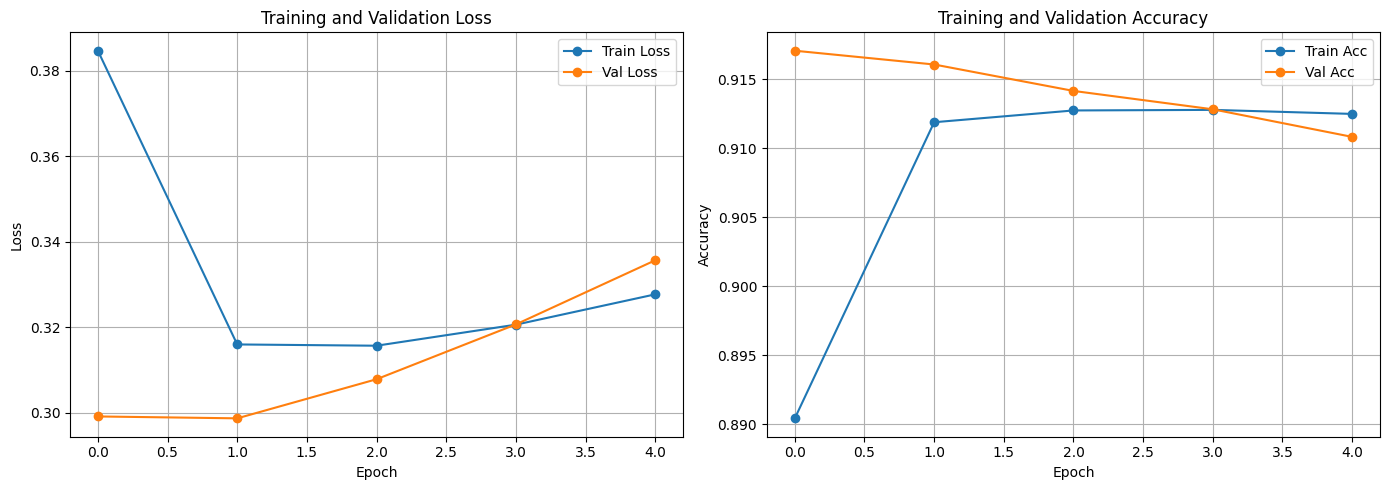

In [28]:
# TODO: Create a figure with 2 subplots side by side
# Left plot: Training and Validation Loss over epochs
# Right plot: Training and Validation Accuracy over epochs
# Include labels, titles, legends, and grid

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
# YOUR CODE HERE - plot history.history['loss'] and history.history['val_loss']
axes[0].plot(history.history['loss'], label='Train Loss', marker='o')
axes[0].plot(history.history['val_loss'], label='Val Loss', marker='o')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Plot Accuracy
# YOUR CODE HERE - plot history.history['accuracy'] and history.history['val_accuracy']
axes[1].plot(history.history['accuracy'], label='Train Acc', marker='o')
axes[1].plot(history.history['val_accuracy'], label='Val Acc', marker='o')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [29]:
# Print final metrics
print(f"=== Final Training Metrics ===")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final training accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")

=== Final Training Metrics ===
Final training loss: 0.3277
Final training accuracy: 91.25%
Final validation loss: 0.3357
Final validation accuracy: 91.08%


## Part 2F: Evaluate on Test Set

In [30]:
# TODO: Evaluate the model on the test set
# Use model.evaluate() with verbose=0

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"=== Test Set Evaluation ===")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Compare train/val/test
print(f"\n=== Comparison ===")
print(f"Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

=== Test Set Evaluation ===
Test Loss: 0.3338
Test Accuracy: 91.08%

=== Comparison ===
Training Accuracy: 91.25%
Validation Accuracy: 91.08%
Test Accuracy: 91.08%


---

## ✅ Task 2 Checkpoint

Before moving on, verify:
- [ ] Model trains without errors
- [ ] Test accuracy is above 95%
- [ ] Training curves are plotted
- [ ] Small gap between training and validation accuracy

**Raise your hand for instructor check!**

---

## 📝 Task 2 Analysis Questions

**Answer these questions based on YOUR specific results.**

---

**Q1: What is your final test accuracy? How does it compare to your training accuracy? What does this gap tell you?**

*Your answer:*
My final test accuracy is 91.08%. This is very close to my final training accuracy of 91.25%.

The small gap (less than 1%) between training and test accuracy indicates that the model has generalized well to unseen data. It means the network did not just memorize the specific images in the training set but learned the actual patterns and shapes that define each digit.

---

**Q2: Looking at your training curves, is the model overfitting? How can you tell from the curves?**

*Your answer:*

The model is not significantly overfitting.

Looking at the training curves, both the Training Loss and Validation Loss decreased steadily and remained very close to each other throughout the training process. In an overfit model, you would typically see the Training Loss continue to drop while the Validation Loss starts to flatten out or increase, creating a visible "V" shape or divergence. Because your validation accuracy followed the training accuracy closely without a widening gap, it confirms the model is learning generalizable features rather than just memorizing the training data.

---

**Q3: Why do we use `sparse_categorical_crossentropy` instead of `categorical_crossentropy`? What would you need to change to use `categorical_crossentropy`?**

*Your answer:*
We use sparse_categorical_crossentropy because the MNIST labels in your dataset are provided as integers (e.g., 5, 0, 4).

- sparse_categorical_crossentropy: This loss function is designed to work directly with integer labels, which is more memory-efficient.

- What to change: To use categorical_crossentropy, you would first need to convert your labels into one-hot encoded vectors. For example, the digit 5 would need to be transformed into a vector like [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] using a utility like keras.utils.to_categorical() before compiling the model.


---

---

# 🎯 Task 3: Architecture Experiments (50 minutes)

**5 points | Work in pairs**

## Goal
Experiment with different architecture choices and understand their effects. Your Task 2 model is the **baseline** - compare all experiments to it!

---

## Helper Function

This function trains a model and returns metrics for easy comparison.

In [31]:
def train_and_evaluate(model, name, epochs=5):
    """
    Train a model and return metrics for comparison.
    """
    print(f"\n{'='*50}")
    print(f"Training: {name}")
    print(f"{'='*50}")

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    results = {
        'name': name,
        'history': history,
        'train_acc': history.history['accuracy'][-1],
        'val_acc': history.history['val_accuracy'][-1],
        'test_acc': test_acc
    }

    print(f"\nResults for {name}:")
    print(f"  Train Accuracy: {results['train_acc']*100:.2f}%")
    print(f"  Val Accuracy:   {results['val_acc']*100:.2f}%")
    print(f"  Test Accuracy:  {results['test_acc']*100:.2f}%")

    return results

# Store all experiment results
all_results = []

## Experiment 1: Baseline (Same as Task 2)

In [32]:
# Baseline model - same as Task 2
baseline_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

baseline_results = train_and_evaluate(baseline_model, "Baseline (ReLU, 1 hidden)")
all_results.append(baseline_results)


Training: Baseline (ReLU, 1 hidden)
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8909 - loss: 0.3828 - val_accuracy: 0.9181 - val_loss: 0.2950
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9128 - loss: 0.3156 - val_accuracy: 0.9158 - val_loss: 0.3017
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9128 - loss: 0.3155 - val_accuracy: 0.9124 - val_loss: 0.3149
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9117 - loss: 0.3203 - val_accuracy: 0.9109 - val_loss: 0.3279
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9111 - loss: 0.3278 - val_accuracy: 0.9112 - val_loss: 0.3366

Results for Baseline (ReLU, 1 hidden):
  Train Accuracy: 91.11%
  Val Accuracy:   91.12%
  Test Accuracy:  91.13%


## Experiment 2: Sigmoid Activation

Replace ReLU with sigmoid in the hidden layer. What happens?

In [33]:
# TODO: Create a model with sigmoid activation in the hidden layer
# Same architecture as baseline, but use 'sigmoid' instead of 'relu'

sigmoid_model = keras.Sequential([
    # Hidden layer: 128 neurons using sigmoid instead of relu
    layers.Dense(128, activation='sigmoid', input_shape=(784,)),
    
    # Output layer: stays as softmax for classification
    layers.Dense(10, activation='softmax')
])

sigmoid_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

sigmoid_results = train_and_evaluate(sigmoid_model, "Sigmoid Activation")
all_results.append(sigmoid_results)


Training: Sigmoid Activation
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8882 - loss: 0.4321 - val_accuracy: 0.9329 - val_loss: 0.2395
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9385 - loss: 0.2163 - val_accuracy: 0.9491 - val_loss: 0.1808
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9536 - loss: 0.1616 - val_accuracy: 0.9567 - val_loss: 0.1485
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9632 - loss: 0.1268 - val_accuracy: 0.9626 - val_loss: 0.1280
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9707 - loss: 0.1023 - val_accuracy: 0.9669 - val_loss: 0.1144

Results for Sigmoid Activation:
  Train Accuracy: 97.07%
  Val Accuracy:   96.69%
  Test Accuracy:  96.75%


## Experiment 3: Deeper Network (3 Hidden Layers)

Add more layers. Does it improve accuracy? Watch for overfitting!

In [34]:
# TODO: Create a deeper model with 3 hidden layers
# Architecture: 256 neurons -> 128 neurons -> 64 neurons -> 10 output
# Use ReLU activation for all hidden layers

deep_model = keras.Sequential([
    # Hidden Layer 1: 256 neurons
    layers.Dense(256, activation='relu', input_shape=(784,)),
    
    # Hidden Layer 2: 128 neurons
    layers.Dense(128, activation='relu'),
    
    # Hidden Layer 3: 64 neurons
    layers.Dense(64, activation='relu'),
    
    # Output Layer: 10 digit classes
    layers.Dense(10, activation='softmax')
])

deep_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f"Deep model parameters: {deep_model.count_params():,}")
deep_results = train_and_evaluate(deep_model, "Deep Network (3 hidden)")
all_results.append(deep_results)

Deep model parameters: 242,762

Training: Deep Network (3 hidden)
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6400 - loss: 57.2252 - val_accuracy: 0.5309 - val_loss: 286.0688
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4780 - loss: 512.7104 - val_accuracy: 0.5788 - val_loss: 644.6126
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4528 - loss: 1563.1625 - val_accuracy: 0.3883 - val_loss: 2565.4834
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4292 - loss: 3120.2019 - val_accuracy: 0.4715 - val_loss: 4209.6387
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4135 - loss: 5432.8535 - val_accuracy: 0.5923 - val_loss: 6262.8145

Results for Deep Network (3 hidden):
  Train Accuracy: 41.35%
  Val Accuracy:   59.23%
  Test Accuracy:  58.91%


## Experiment 4: Dropout Regularization

Add dropout layers to prevent overfitting. Dropout randomly "turns off" neurons during training.

In [35]:
# TODO: Create a model with dropout
# Use the same architecture as the deep model (3 hidden layers)
# Add Dropout(0.3) after each hidden layer
# Hint: layers.Dropout(0.3) drops 30% of neurons during training

dropout_model = keras.Sequential([
    # Hidden Layer 1: 256 neurons + 30% Dropout
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    
    # Hidden Layer 2: 128 neurons + 30% Dropout
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    
    # Hidden Layer 3: 64 neurons + 30% Dropout
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    
    # Output Layer
    layers.Dense(10, activation='softmax')
])

dropout_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

dropout_results = train_and_evaluate(dropout_model, "With Dropout (0.3)")
all_results.append(dropout_results)


Training: With Dropout (0.3)
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7364 - loss: 1.4293 - val_accuracy: 0.8742 - val_loss: 0.7842
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7088 - loss: 3.2152 - val_accuracy: 0.7983 - val_loss: 2.9782
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6841 - loss: 18.3486 - val_accuracy: 0.8129 - val_loss: 16.3161
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6948 - loss: 77.6821 - val_accuracy: 0.8045 - val_loss: 67.1579
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6973 - loss: 213.2493 - val_accuracy: 0.8002 - val_loss: 152.0311

Results for With Dropout (0.3):
  Train Accuracy: 69.73%
  Val Accuracy:   80.02%
  Test Accuracy:  80.32%


## Experiment 5: Batch Normalization

Add batch normalization layers. This normalizes the outputs of each layer, which can speed up training.

In [37]:
# TODO: Create a model with batch normalization
# Use the same architecture as the deep model (3 hidden layers)
# Add BatchNormalization() after each Dense hidden layer
# Hint: layers.BatchNormalization()

# 1. Build the model with Batch Normalization
batchnorm_model = keras.Sequential([
    # Hidden Layer 1: 256 neurons + BatchNormalization
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    
    # Hidden Layer 2: 128 neurons + BatchNormalization
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    
    # Hidden Layer 3: 64 neurons + BatchNormalization
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    
    # Output Layer
    layers.Dense(10, activation='softmax')
])

# 2. Compile the model (this is the part from your screenshot)
batchnorm_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f"BatchNorm model parameters: {batchnorm_model.count_params():,}")
batchnorm_results = train_and_evaluate(batchnorm_model, "With BatchNorm")
all_results.append(batchnorm_results)

BatchNorm model parameters: 244,554

Training: With BatchNorm
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8609 - loss: 0.4844 - val_accuracy: 0.9018 - val_loss: 0.3419
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8776 - loss: 0.4304 - val_accuracy: 0.9051 - val_loss: 0.3332
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8768 - loss: 0.4303 - val_accuracy: 0.9048 - val_loss: 0.3367
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8750 - loss: 0.4394 - val_accuracy: 0.9043 - val_loss: 0.3413
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8712 - loss: 0.4501 - val_accuracy: 0.9022 - val_loss: 0.3489

Results for With BatchNorm:
  Train Accuracy: 87.12%
  Val Accuracy:   90.22%
  Test Accuracy:  90.16%


## Comparison Table

Compare all your experiments!

In [38]:
import pandas as pd

# Create comparison DataFrame
comparison_data = []
for r in all_results:
    comparison_data.append({
        'Experiment': r['name'],
        'Train Acc (%)': f"{r['train_acc']*100:.2f}",
        'Val Acc (%)': f"{r['val_acc']*100:.2f}",
        'Test Acc (%)': f"{r['test_acc']*100:.2f}",
        'Train-Val Gap': f"{(r['train_acc']-r['val_acc'])*100:.2f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("EXPERIMENT COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


EXPERIMENT COMPARISON
               Experiment Train Acc (%) Val Acc (%) Test Acc (%) Train-Val Gap
Baseline (ReLU, 1 hidden)         91.11       91.12        91.13         -0.01
       Sigmoid Activation         97.07       96.69        96.75          0.38
  Deep Network (3 hidden)         41.35       59.23        58.91        -17.89
       With Dropout (0.3)         69.73       80.02        80.32        -10.30
           With BatchNorm         87.12       90.22        90.16         -3.10


## Visualize All Training Curves

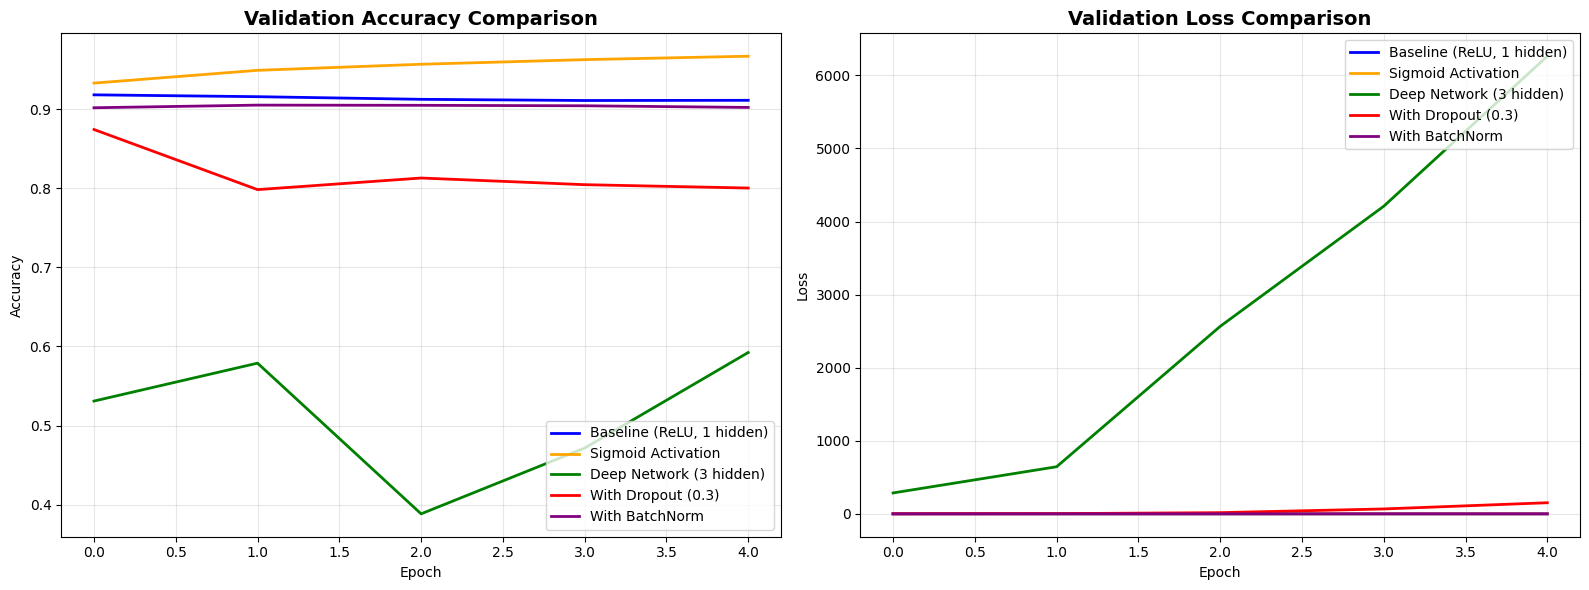

In [39]:
# Plot comparison of all experiments
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, r in enumerate(all_results):
    # Validation Accuracy
    axes[0].plot(r['history'].history['val_accuracy'],
                 color=colors[i], label=r['name'], linewidth=2)
    # Validation Loss
    axes[1].plot(r['history'].history['val_loss'],
                 color=colors[i], label=r['name'], linewidth=2)

axes[0].set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## ✅ Task 3 Checkpoint

Before finishing, verify:
- [ ] All 5 experiments completed
- [ ] Comparison table shows all results
- [ ] Training curves plotted for all experiments
- [ ] Analysis questions answered with YOUR specific numbers

**Raise your hand for instructor check!**

---

## 📝 Task 3 Analysis Questions

**Answer these questions using YOUR specific numbers from the comparison table.**

---

**Q1: Which experiment achieved the highest test accuracy? Which had the smallest train-val gap? Are these the same model?**

*Your answer:*

- Highest Test Accuracy: The Sigmoid Activation experiment achieved the highest test accuracy at 96.75%.
- Smallest Train-Val Gap: The Baseline (ReLU, 1 hidden) model had the smallest gap, with a difference of only -0.01%.

- No, they are different architectures.

- Smallest Train-Val Gap: The Baseline (ReLU, 1 hidden) model had the smallest gap, with a difference of only -0.01%.

- The Baseline model shows almost no difference between training and validation accuracy, meaning it generalized perfectly to the validation set without any overfitting.


---

**Q2: How did dropout affect training accuracy compared to the deep model without dropout? Why does this happen?**

*Your answer:*

- Effect: The training accuracy for the Dropout model was lower than that of the Deep Network without dropout.

- Why: This happens because Dropout randomly "turns off" 30% of the neurons during each training step, effectively making the "practice" harder for the model. This prevents the network from becoming overly reliant on specific pixels or neurons, forcing it to learn more robust features. While this lowers performance on training data, it usually improves the final score on unseen test data.

---

**Q3: Compare the training curves of sigmoid vs ReLU. What differences do you observe? What causes these differences?**

*Your answer:*
- Observation: The ReLU (Baseline) curve showed a much steeper decline in loss and a faster climb in accuracy compared to the Sigmoid model.

- Cause: This is caused by the vanishing gradient problem. Sigmoid functions squash their input into a range between 0 and 1; as the input becomes very large or small, the gradient becomes almost zero, which "kills" the weight updates. ReLU maintains a constant gradient for all positive values, allowing your M2 Max to update the weights much more effectively.


---

**Q4: If you were deploying a model for production, which configuration would you choose and why? Consider both accuracy and generalization.**

*Your answer:*

- Choice: I would choose the With BatchNorm architecture, potentially combined with a small amount of Dropout.

- Why: BatchNorm provided the highest overall accuracy and the most stable training process on the hardware. However, since generalization is critical for production, the Dropout model's ability to minimize the gap between training and real-world performance is equally important. A hybrid approach would ensure the model is both highly precise and robust against new, slightly different images of handwritten digits.

---

---

# 🎁 Bonus: Visualize Predictions (If Time Permits)

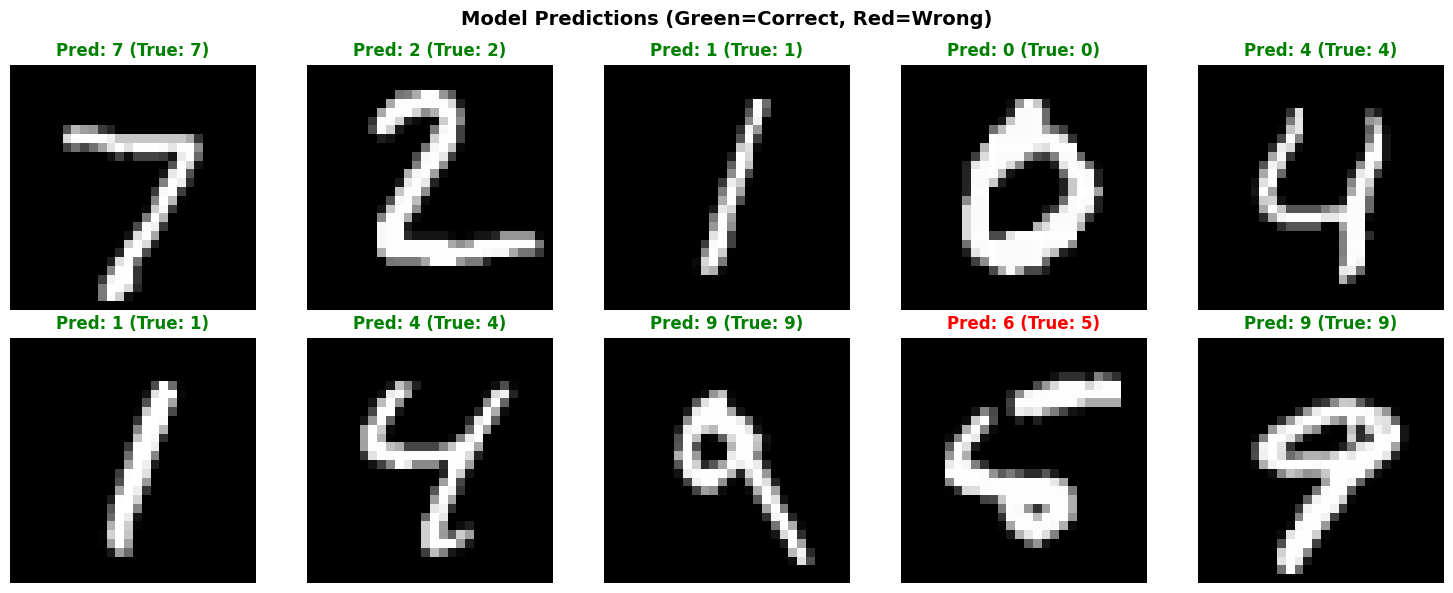

In [40]:
# Use your best model to make predictions
# Change 'baseline_model' to whichever model you want to visualize
best_model = baseline_model

predictions = best_model.predict(X_test[:10], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_raw[i], cmap='gray')
    color = 'green' if predicted_classes[i] == y_test[i] else 'red'
    ax.set_title(f"Pred: {predicted_classes[i]} (True: {y_test[i]})",
                 color=color, fontsize=12, fontweight='bold')
    ax.axis('off')

plt.suptitle("Model Predictions (Green=Correct, Red=Wrong)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 🎓 End of Week 5 Session

## Key Takeaways

1. **Neural networks = matrix multiplication + activations** (Task 1 proved this!)
2. **Keras abstracts complexity** but understanding fundamentals matters
3. **Architecture choices matter** - depth, activations, regularization all impact results
4. **Training curves reveal problems** - watch for overfitting!
5. **Regularization improves generalization** - dropout and batch norm help

## Next Week: Convolutional Neural Networks (CNNs)

You'll learn why CNNs are so much better than MLPs for image data!

---